<a href="https://colab.research.google.com/github/ana1037/API_web_service/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [19]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [24]:
import pandas as pd

tiendas_map = {
    'tienda_1.csv': tienda,
    'tienda_2.csv': tienda2,
    'tienda_3.csv': tienda3,
    'tienda_4.csv': tienda4
}

import pandas as pd

def formatear_precio(valor):
    """Convierte un número a formato de moneda con punto como separador de miles."""
    return f"${int(valor):,}".replace(",", ".")

tiendas_map = {
    'tienda_1.csv': tienda,
    'tienda_2.csv': tienda2,
    'tienda_3.csv': tienda3,
    'tienda_4.csv': tienda4
}

facturacion_por_tienda = {}

for nombre, df in tiendas_map.items():
    total_facturado = df['Precio'].sum()
    facturacion_por_tienda[nombre] = total_facturado

df_facturacion = pd.DataFrame(
    list(facturacion_por_tienda.items()),
    columns=['Tienda', 'Facturación Total']
).sort_values(by='Facturación Total', ascending=False)


df_facturacion['Facturación Total'] = df_facturacion['Facturación Total'].apply(formatear_precio)

print("--- Facturación Total por Tienda (Usando Función Nombrada) ---")
print(df_facturacion.to_markdown(index=False))

--- Facturación Total por Tienda (Usando Función Nombrada) ---
| Tienda       | Facturación Total   |
|:-------------|:--------------------|
| tienda_1.csv | $1.150.880.400      |
| tienda_2.csv | $1.116.343.500      |
| tienda_3.csv | $1.098.019.600      |
| tienda_4.csv | $1.038.375.700      |


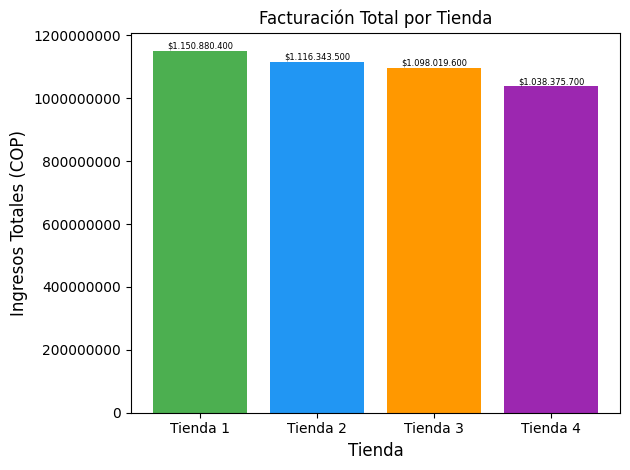


--- Facturación Total por Tienda ---
| Tienda   | Facturación Total   |
|:---------|:--------------------|
| Tienda 1 | $1.150.880.400      |
| Tienda 2 | $1.116.343.500      |
| Tienda 3 | $1.098.019.600      |
| Tienda 4 | $1.038.375.700      |


In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np # Importamos numpy para usar su función arange si es necesario

# Nota: Asumimos que las variables 'tienda', 'tienda2', 'tienda3', 'tienda4' ya están cargadas.

# --- PASO 1: Preparar los Datos ---

# 1. Definimos una función para dar formato al precio
def formatear_precio(valor):
    """Convierte un número a formato de moneda para impresión."""
    return f"${int(valor):,}".replace(",", ".")

# 2. Mapeo de tiendas y cálculo de facturación
tiendas_map = {
    'Tienda 1': tienda,
    'Tienda 2': tienda2,
    'Tienda 3': tienda3,
    'Tienda 4': tienda4
}

facturacion_por_tienda = {}

for nombre, df in tiendas_map.items():
    total_facturado = df['Precio'].sum()
    facturacion_por_tienda[nombre] = total_facturado

# 3. Convertir a DataFrame y ordenar (para el gráfico)
df_facturacion = pd.DataFrame(
    list(facturacion_por_tienda.items()),
    columns=['Tienda', 'Facturación Total']
).sort_values(by='Facturación Total', ascending=False)


# --- PASO 2: Generar el Gráfico de Barras con Matplotlib ---

# 1. Definir los datos del gráfico
tiendas = df_facturacion['Tienda']
ingresos = df_facturacion['Facturación Total']

# 3. Crear el gráfico de barras
# plt.bar(Eje X, Eje Y)
plt.bar(tiendas, ingresos, color=['#4CAF50', '#2196F3', '#FF9800', '#9C27B0']) # Colores para mejor distinción
plt.ticklabel_format(style='plain', axis='y')

# 4. Añadir etiquetas, título y formato
plt.title('Facturación Total por Tienda')
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Ingresos Totales (COP)', fontsize=12)

# 5. Añadir el valor exacto encima de cada barra
for i, valor in enumerate(ingresos):
    # Usamos la función de formato para mostrar el número de forma legible
    plt.text(i, valor + 100000, formatear_precio(valor), ha='center', va='bottom', fontsize= 6, rotation=0)

# 6. Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()

# Imprimir la tabla de resultados final para referencia
print("\n--- Facturación Total por Tienda ---")
df_facturacion['Facturación Total'] = df_facturacion['Facturación Total'].apply(formatear_precio)
print(df_facturacion.to_markdown(index=False))

# 2. Ventas por categoría

In [38]:
import pandas as pd

tiendas_map = {
    'Tienda 1': tienda,
    'Tienda 2': tienda2,
    'Tienda 3': tienda3,
    'Tienda 4': tienda4
}

resumen_por_categoria = {}

print("--- Análisis de Ingresos por Categoría de Producto ---")

for nombre, df in tiendas_map.items():

    df_categoria = df.groupby('Categoría del Producto')['Precio'].sum()
    df_categoria = df_categoria.sort_values(ascending=False).reset_index()

    df_categoria['Precio'] = df_categoria['Precio'].apply(
        lambda x: f"${int(x):,}".replace(",", ".")
    )

    resumen_por_categoria[nombre] = df_categoria

    print(f"\n### {nombre}: Top 5 Categorías por Ingresos")
    print(df_categoria.head(5).to_markdown(index=False))

--- Análisis de Ingresos por Categoría de Producto ---

### Tienda 1: Top 5 Categorías por Ingresos
| Categoría del Producto   | Precio       |
|:-------------------------|:-------------|
| Electrónicos             | $429.493.500 |
| Electrodomésticos        | $363.685.200 |
| Muebles                  | $187.633.700 |
| Instrumentos musicales   | $91.299.000  |
| Deportes y diversión     | $39.290.000  |

### Tienda 2: Top 5 Categorías por Ingresos
| Categoría del Producto   | Precio       |
|:-------------------------|:-------------|
| Electrónicos             | $410.831.100 |
| Electrodomésticos        | $348.567.800 |
| Muebles                  | $176.426.300 |
| Instrumentos musicales   | $104.990.300 |
| Deportes y diversión     | $34.744.500  |

### Tienda 3: Top 5 Categorías por Ingresos
| Categoría del Producto   | Precio       |
|:-------------------------|:-------------|
| Electrónicos             | $410.775.800 |
| Electrodomésticos        | $329.237.900 |
| Muebles         

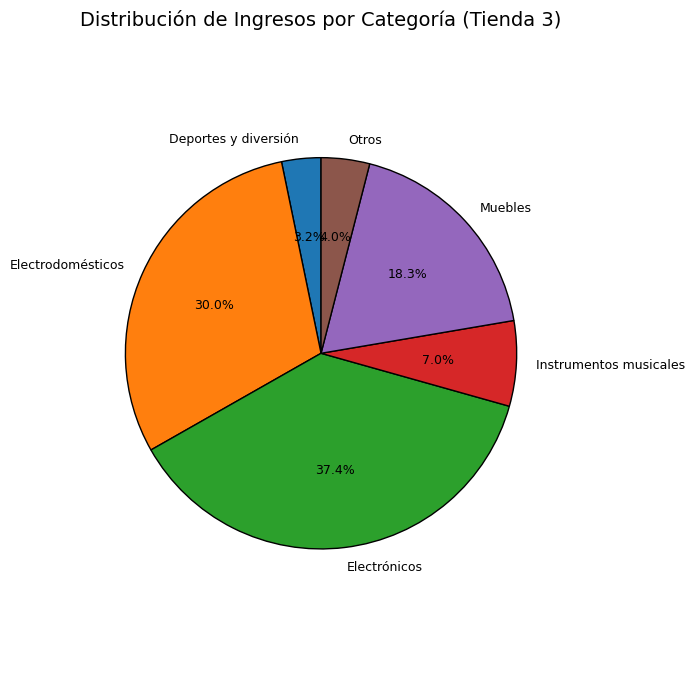


--- Categorías por Ingresos (Agrupadas) ---
| Categoría del Producto   |   Porcentaje |
|:-------------------------|-------------:|
| Electrónicos             |     37.4106  |
| Electrodomésticos        |     29.9847  |
| Muebles                  |     18.3123  |
| Instrumentos musicales   |      7.04732 |
| Otros                    |      4.00355 |
| Deportes y diversión     |      3.24157 |


In [39]:
import pandas as pd
import matplotlib.pyplot as plt
# Nota: La variable 'tienda3' debe estar cargada en tu Colab.

# 1. Agrupar los datos de la Tienda 3 por categoría y calcular el porcentaje
df_categoria_tienda3 = tienda3.groupby('Categoría del Producto')['Precio'].sum()
total_facturacion = df_categoria_tienda3.sum()
df_categoria_tienda3 = df_categoria_tienda3.reset_index(name='Ingresos')
df_categoria_tienda3['Porcentaje'] = (df_categoria_tienda3['Ingresos'] / total_facturacion) * 100

# 2. Definir el umbral y agrupar
UMBRAL_PORCENTAJE = 3.0 # Definimos que todo menor a 3% va a "Otros"

# Categorías que superan el umbral
df_principales = df_categoria_tienda3[df_categoria_tienda3['Porcentaje'] >= UMBRAL_PORCENTAJE]

# Categorías que están por debajo del umbral (para agruparlas)
otros_ingresos = df_categoria_tienda3[df_categoria_tienda3['Porcentaje'] < UMBRAL_PORCENTAJE]['Ingresos'].sum()
otros_porcentaje = df_categoria_tienda3[df_categoria_tienda3['Porcentaje'] < UMBRAL_PORCENTAJE]['Porcentaje'].sum()

# 3. Crear la fila 'Otros' y consolidar el DataFrame final
if otros_porcentaje > 0:
    df_otros = pd.DataFrame([{'Categoría del Producto': 'Otros', 'Ingresos': otros_ingresos, 'Porcentaje': otros_porcentaje}])
    df_grafico = pd.concat([df_principales, df_otros], ignore_index=True)
else:
    df_grafico = df_principales

# 4. Preparar los datos para el gráfico final
etiquetas = df_grafico['Categoría del Producto']
valores = df_grafico['Ingresos']

# 5. Iniciar la figura del gráfico (tamaño reducido para mejor visualización)
plt.figure(figsize=(7, 7))

# 6. Crear el gráfico de pastel
plt.pie(
    valores,
    labels=etiquetas,
    autopct='%1.1f%%', # Formato de porcentaje
    startangle=90,
    textprops={'fontsize': 9},
    wedgeprops={'edgecolor': 'black'} # Añade un borde negro para separar las porciones
)

# 7. Añadir título y ajustar
plt.title('Distribución de Ingresos por Categoría (Tienda 3)', fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.show()

print("\n--- Categorías por Ingresos (Agrupadas) ---")
print(df_grafico.sort_values(by='Ingresos', ascending=False)[['Categoría del Producto', 'Porcentaje']].to_markdown(index=False))

# 3. Calificación promedio de la tienda


In [41]:
import pandas as pd

# Mapeamos los DataFrames a nombres simples
tiendas_map = {
    'Tienda 1': tienda,
    'Tienda 2': tienda2,
    'Tienda 3': tienda3,
    'Tienda 4': tienda4
}

calificacion_promedio = {}

print("--- Calificación Promedio por Tienda ---")

for nombre, df in tiendas_map.items():

    # 1. Calculamos el promedio de la columna 'Calificación'
    # El comando .mean() calcula el promedio (suma de todos / cantidad de elementos)
    promedio = df['Calificación'].mean()

    # Guardamos el resultado con 2 decimales
    calificacion_promedio[nombre] = round(promedio, 2)

# 2. Convertir a DataFrame y ordenar (para ver qué tienda tiene la mejor calificación)
df_calificacion = pd.DataFrame(
    list(calificacion_promedio.items()),
    columns=['Tienda', 'Calificación Promedio']
).sort_values(by='Calificación Promedio', ascending=False)

print(df_calificacion.to_markdown(index=False))

--- Calificación Promedio por Tienda ---
| Tienda   |   Calificación Promedio |
|:---------|------------------------:|
| Tienda 3 |                    4.05 |
| Tienda 2 |                    4.04 |
| Tienda 4 |                    4    |
| Tienda 1 |                    3.98 |


# 4. Productos más y menos vendidos

In [46]:
import pandas as pd

# --- 1. CARGA DE DATOS ---
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

# 2. CONSOLIDACIÓN
lista_tiendas = [tienda, tienda2, tienda3, tienda4]
ventas_totales = pd.concat(lista_tiendas, ignore_index=True)

# 3. Función de formato
def formatear_precio(valor):
    """Convierte un número a formato de moneda con punto como separador de miles."""
    return f"${int(valor):,}".replace(",", ".")

# --- 4. ANÁLISIS POR INGRESOS (VALOR) ---
# Agrupar por 'Producto' y sumar el 'Precio'.
df_ingresos_productos = ventas_totales.groupby('Producto')['Precio'].sum()
df_ingresos_productos = df_ingresos_productos.sort_values(ascending=False).reset_index(name='Ingresos Generados')

# Aplicar formato para mostrar los números correctamente
df_ingresos_productos['Ingresos Generados'] = df_ingresos_productos['Ingresos Generados'].apply(formatear_precio)

print("---Clasificación de Productos por Ingresos Generados (GLOBAL) ---")
print("\n### Top 10 Productos (Los que más dinero aportan):\n")
print(df_ingresos_productos.head(10).to_markdown(index=False))

print("\n### Bottom 10 Productos (Los que menos dinero aportan):\n")
# Usamos .tail(10) para obtener los 10 productos con menos ingresos
print(df_ingresos_productos.tail(10).to_markdown(index=False))

---Clasificación de Productos por Ingresos Generados (GLOBAL) ---

### Top 10 Productos (Los que más dinero aportan):

| Producto         | Ingresos Generados   |
|:-----------------|:---------------------|
| TV LED UHD 4K    | $432.489.600         |
| Iphone 15        | $401.051.200         |
| Refrigerador     | $384.937.400         |
| Smart TV         | $290.221.800         |
| Lavadora de ropa | $242.468.600         |
| Lavavajillas     | $240.536.500         |
| Tablet ABXY      | $219.012.800         |
| Secadora de ropa | $210.238.000         |
| Celular ABXY     | $157.911.100         |
| Batería          | $147.806.300         |

### Bottom 10 Productos (Los que menos dinero aportan):

| Producto                | Ingresos Generados   |
|:------------------------|:---------------------|
| Muñeca bebé             | $8.591.500           |
| Cubertería              | $8.560.400           |
| Vaso térmico            | $8.497.400           |
| Bloques de construcción | $6.802.100  

# 5. Envío promedio por tienda

In [47]:
import pandas as pd

# URLs de los archivos de GitHub (se asume esta es la fuente estable)
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

# Cargar DataFrames
tienda = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

# Mapeamos los DataFrames a nombres simples
tiendas_map = {
    'Tienda 1': tienda,
    'Tienda 2': tienda2,
    'Tienda 3': tienda3,
    'Tienda 4': tienda4
}

costo_envio_promedio = {}

# Función de formato para la impresión final
def formatear_precio(valor):
    """Convierte un número a formato de moneda con punto como separador de miles."""
    return f"${int(valor):,}".replace(",", ".")

for nombre, df in tiendas_map.items():

    # Calculamos el promedio de la columna 'Costo de envío'
    promedio = df['Costo de envío'].mean()

    # Guardamos el resultado con 2 decimales para precisión en el cálculo
    costo_envio_promedio[nombre] = round(promedio, 2)

# 2. Convertir a DataFrame y ordenar (para ver qué tienda tiene el costo más bajo)
df_envio = pd.DataFrame(
    list(costo_envio_promedio.items()),
    columns=['Tienda', 'Costo de Envío Promedio']
).sort_values(by='Costo de Envío Promedio', ascending=True)

# 3. Aplicar formato para la presentación
df_envio['Costo de Envío Promedio (COP)'] = df_envio['Costo de Envío Promedio'].apply(formatear_precio)

print("--- Costo de Envío Promedio por Tienda ---")
print(df_envio[['Tienda', 'Costo de Envío Promedio (COP)']].to_markdown(index=False))

--- Costo de Envío Promedio por Tienda ---
| Tienda   | Costo de Envío Promedio (COP)   |
|:---------|:--------------------------------|
| Tienda 4 | $23.459                         |
| Tienda 3 | $24.805                         |
| Tienda 2 | $25.216                         |
| Tienda 1 | $26.018                         |


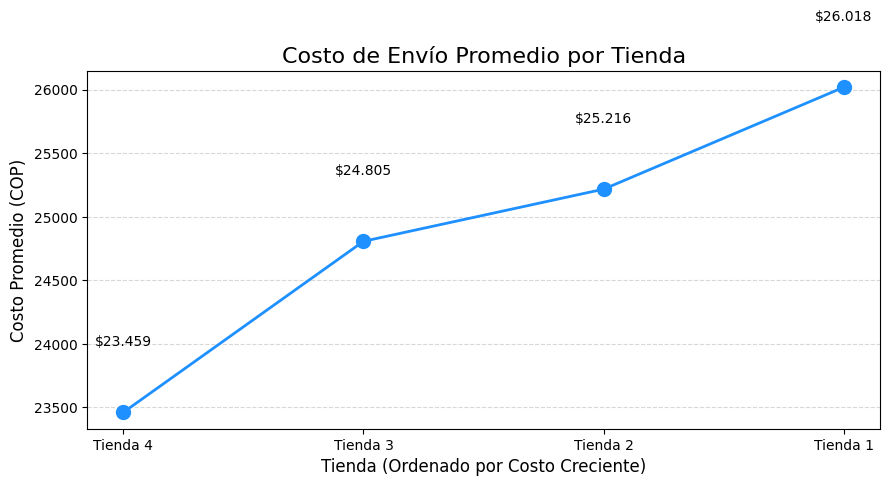

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. CARGA Y CÁLCULO DE ENVÍO PROMEDIO (Se incluye para garantizar el cálculo) ---
# Se asumen las URLs de los archivos de GitHub
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tiendas_map = {
    'Tienda 1': tienda,
    'Tienda 2': tienda2,
    'Tienda 3': tienda3,
    'Tienda 4': tienda4
}

costo_envio_promedio = {}
for nombre, df in tiendas_map.items():
    promedio = df['Costo de envío'].mean()
    costo_envio_promedio[nombre] = round(promedio, 2)

df_envio = pd.DataFrame(
    list(costo_envio_promedio.items()),
    columns=['Tienda', 'Costo de Envío Promedio']
).sort_values(by='Costo de Envío Promedio', ascending=True) # Ordenado de menor a mayor costo

# --- 2. GENERACIÓN DEL GRÁFICO DE LÍNEAS ---
tiendas = df_envio['Tienda']
costos = df_envio['Costo de Envío Promedio']

# Función de formato para las etiquetas de datos
def formatear_precio(valor):
    return f"${int(valor):,}".replace(",", ".")

# Creamos la figura
plt.figure(figsize=(9, 5))

# Gráfico de Líneas (Line Plot). 'o-' conecta los puntos con líneas.
plt.plot(
    tiendas,
    costos,
    marker='o',         # Marcadores en forma de círculo
    linestyle='-',      # Línea continua
    color='#1E90FF',    # Azul vibrante
    markersize=10,      # Tamaño del punto
    linewidth=2         # Grosor de la línea
)

# Añadir etiquetas y título
plt.title('Costo de Envío Promedio por Tienda', fontsize=16)
plt.xlabel('Tienda (Ordenado por Costo Creciente)', fontsize=12)
plt.ylabel('Costo Promedio (COP)', fontsize=12)

# Ajustes de visualización
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Añadir el valor exacto encima de cada punto
for i, valor in enumerate(costos):
    plt.text(tiendas.iloc[i], valor + 500, formatear_precio(valor),
             ha='center', va='bottom', fontsize=10)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

## 6. Ventas por ciudad

In [50]:
import pandas as pd

# 1. Consolidar todas las tiendas en un solo DataFrame (Si no lo has hecho ya)
lista_tiendas = [tienda, tienda2, tienda3, tienda4]
ventas_totales = pd.concat(lista_tiendas, ignore_index=True)

# 2. Agrupar por 'Lugar de Compra' y sumar el 'Precio'
df_ciudades = ventas_totales.groupby('Lugar de Compra')['Precio'].sum()

# 3. Convertir a DataFrame y ordenar
df_ciudades = df_ciudades.sort_values(ascending=False).reset_index(name='Ingresos Generados')

# 4. Aplicar formato para la tabla
def formatear_precio(valor):
    return f"${int(valor):,}".replace(",", ".")

df_ciudades['Ingresos Generados'] = df_ciudades['Ingresos Generados'].apply(formatear_precio)

print("\n--- Top 5 Ciudades por Ingresos Globales ---")
print(df_ciudades.head(5).to_markdown(index=False))


--- Top 5 Ciudades por Ingresos Globales ---
| Lugar de Compra   | Ingresos Generados   |
|:------------------|:---------------------|
| Bogotá            | $1.814.858.300       |
| Medellín          | $1.096.669.200       |
| Cali              | $506.526.100         |
| Pereira           | $225.927.300         |
| Barranquilla      | $132.040.500         |


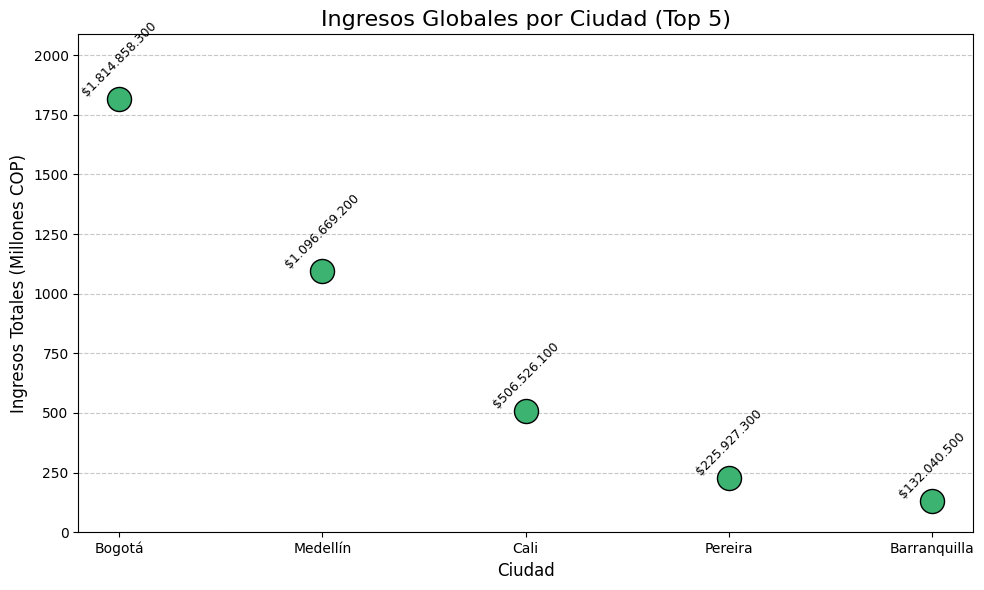

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. CARGA Y CÁLCULO DE INGRESOS POR CIUDAD ---
# Se asumen las URLs de los archivos de GitHub para la estabilidad.
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

lista_tiendas = [tienda, tienda2, tienda3, tienda4]
ventas_totales = pd.concat(lista_tiendas, ignore_index=True)

# Agrupar y seleccionar el Top 5
df_ciudades = ventas_totales.groupby('Lugar de Compra')['Precio'].sum()
df_ciudades = df_ciudades.sort_values(ascending=False).reset_index(name='Ingresos Generados')
df_top5_ciudades = df_ciudades.head(5)

# 2. Preparación de datos y formato
ciudades = df_top5_ciudades['Lugar de Compra']
ingresos = df_top5_ciudades['Ingresos Generados']
ingresos_en_millones = ingresos / 1000000

def formatear_precio(valor):
    return f"${int(valor):,}".replace(",", ".")

# --- 3. GENERACIÓN DEL GRÁFICO DE PUNTOS ---
plt.figure(figsize=(10, 6))

# Gráfico de puntos. Utilizamos un tamaño de marcador fijo para mayor claridad (s=300).
plt.scatter(
    ciudades,
    ingresos_en_millones,
    color='#3CB371', # Color verde distintivo
    s=300,           # Tamaño fijo de los puntos (grande para verlo bien)
    edgecolors='black', # Borde negro
    zorder=3
)

# Añadir etiquetas y formato
plt.title('Ingresos Globales por Ciudad (Top 5)', fontsize=16)
plt.xlabel('Ciudad', fontsize=12)
plt.ylabel('Ingresos Totales (Millones COP)', fontsize=12)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Añadir el valor exacto encima de cada punto
for i, valor_original in enumerate(ingresos):
    plt.text(ciudades.iloc[i], valor_original / 1000000 + 1, formatear_precio(valor_original),
             ha='center', va='bottom', fontsize=9, rotation=45)

# Ajustar límites del eje Y
plt.ylim(0, max(ingresos_en_millones) * 1.15)
plt.tight_layout()
plt.show()

## **INFORME**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

# --- 1. CARGA DE DATOS Y PREPARACIÓN ---
# ¡Vamos a buscar los datos en internet!
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

# Cargar y juntar todos los archivos en una sola tabla grande
tienda1 = pd.read_csv(url1).assign(Tienda='Tienda 1')
tienda2 = pd.read_csv(url2).assign(Tienda='Tienda 2')
tienda3 = pd.read_csv(url3).assign(Tienda='Tienda 3')
tienda4 = pd.read_csv(url4).assign(Tienda='Tienda 4')
df_consolidado = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)

# El "lucro" más fácil de calcular es el Ingreso Neto: Precio de Venta - Costo de Envío
df_consolidado['Ingreso Neto'] = df_consolidado['Precio'] - df_consolidado['Costo de envío']

# --- 2. CÁLCULO DE LAS 5 EVALUACIONES ---
# Agrupamos los datos y sacamos el total, el promedio y el conteo.
df_evaluacion = df_consolidado.groupby('Tienda').agg(
    Ingreso_Neto_Total=('Ingreso Neto', 'sum'),
    Costo_Envio_Promedio=('Costo de envío', 'mean'),
    Calificacion_Promedio=('Calificación', 'mean'),
    Volumen_de_Ventas=('Precio', 'count'),
    Precio_Promedio_Venta=('Precio', 'mean')
).reset_index()

# Renombrar para que se vea bonito en la tabla
df_evaluacion = df_evaluacion.rename(columns={
    'Ingreso_Neto_Total': 'Ingreso Neto Total',
    'Costo_Envio_Promedio': 'Costo de Envío Promedio',
    'Calificacion_Promedio': 'Calificación Promedio',
    'Volumen_de_Ventas': 'Volumen de Ventas',
    'Precio_Promedio_Venta': 'Precio Promedio de Venta'
})

# Ordenar para encontrar rápido al peor
df_evaluacion = df_evaluacion.sort_values(by='Ingreso Neto Total', ascending=True)

# --- 3. PREPARACIÓN DE FORMATOS Y GRÁFICO ---
def formatear_precio(valor):
    return f"${int(valor):,}".replace(",", ".")

df_evaluacion['Ingreso Neto Total (COP)'] = df_evaluacion['Ingreso Neto Total'].apply(formatear_precio)
df_evaluacion['Costo de Envío Promedio (COP)'] = df_evaluacion['Costo de Envío Promedio'].apply(formatear_precio)
df_evaluacion['Precio Promedio de Venta (COP)'] = df_evaluacion['Precio Promedio de Venta'].apply(formatear_precio)

tienda_peor = df_evaluacion.iloc[0]['Tienda']
ingreso_peor = df_evaluacion.iloc[0]['Ingreso Neto Total']

# Generación del Gráfico (El peor en rojo)
plt.figure(figsize=(9, 5))
colores = ['#FF6347' if t == tienda_peor else '#1E90FF' for t in df_evaluacion['Tienda']]
ingresos_millones = df_evaluacion['Ingreso Neto Total'] / 1000000

barras = plt.bar(df_evaluacion['Tienda'], ingresos_millones, color=colores)
plt.title('Ingreso Neto Total por Tienda (Lo que queda de dinero)', fontsize=16)
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Dinero que queda (Millones COP)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, barra in enumerate(barras):
    plt.text(barra.get_x() + barra.get_width()/2, barra.get_height() + 1,
             formatear_precio(df_evaluacion.iloc[i]['Ingreso Neto Total']),
             ha='center', va='bottom', fontsize=9, rotation=45)

plt.ylim(0, max(ingresos_millones) * 1.15)
plt.show()

# --- 4. PREPARACIÓN DEL REPORTE FINAL ---
df_reporte = df_evaluacion[['Tienda',
                            'Ingreso Neto Total (COP)',
                            'Costo de Envío Promedio (COP)',
                            'Calificación Promedio',
                            'Volumen de Ventas',
                            'Precio Promedio de Venta (COP)']]

# Mostrar el reporte en formato Markdown
display(Markdown("---"))
display(Markdown("## 📋 Resumen de Desempeño por Tienda"))
display(Markdown("¡Aquí está la tabla con todas las métricas clave que calculamos!"))
display(df_reporte.to_markdown(index=False))
display(Markdown("---"))

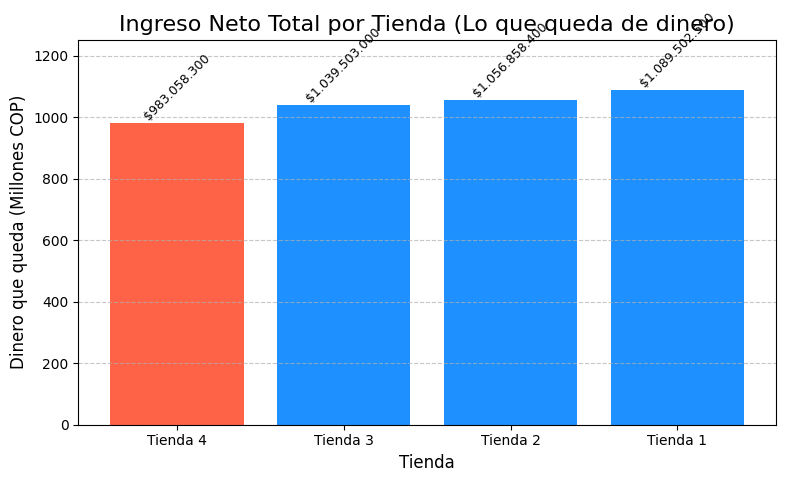

---

## 📋 Resumen de Desempeño por Tienda

¡Aquí está la tabla con todas las métricas clave que calculamos!

'| Tienda   | Ingreso Neto Total (COP)   | Costo de Envío Promedio (COP)   |   Calificación Promedio |   Volumen de Ventas | Precio Promedio de Venta (COP)   |\n|:---------|:---------------------------|:--------------------------------|------------------------:|--------------------:|:---------------------------------|\n| Tienda 4 | $983.058.300               | $23.459                         |                 3.99576 |                2358 | $440.362                         |\n| Tienda 3 | $1.039.503.000             | $24.805                         |                 4.04833 |                2359 | $465.459                         |\n| Tienda 2 | $1.056.858.400             | $25.216                         |                 4.0373  |                2359 | $473.227                         |\n| Tienda 1 | $1.089.502.500             | $26.018                         |                 3.97669 |                2359 | $487.867                         |'

---

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

# --- 1. CARGA DE DATOS Y PREPARACIÓN ---
# ¡Vamos a buscar los datos en internet!
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

# Cargar y juntar todos los archivos en una sola tabla grande
tienda1 = pd.read_csv(url1).assign(Tienda='Tienda 1')
tienda2 = pd.read_csv(url2).assign(Tienda='Tienda 2')
tienda3 = pd.read_csv(url3).assign(Tienda='Tienda 3')
tienda4 = pd.read_csv(url4).assign(Tienda='Tienda 4')
df_consolidado = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)

# El "lucro" más fácil de calcular es el Ingreso Neto: Precio de Venta - Costo de Envío
df_consolidado['Ingreso Neto'] = df_consolidado['Precio'] - df_consolidado['Costo de envío']

# --- 2. CÁLCULO DE LAS 5 EVALUACIONES ---
df_evaluacion = df_consolidado.groupby('Tienda').agg(
    Ingreso_Neto_Total=('Ingreso Neto', 'sum'),
    Costo_Envio_Promedio=('Costo de envío', 'mean'),
    Calificacion_Promedio=('Calificación', 'mean'),
    Volumen_de_Ventas=('Precio', 'count'),
    Precio_Promedio_Venta=('Precio', 'mean')
).reset_index()

# Renombrar para que se vea bonito en la tabla
df_evaluacion = df_evaluacion.rename(columns={
    'Ingreso_Neto_Total': 'Ingreso Neto Total',
    'Costo_Envio_Promedio': 'Costo de Envío Promedio',
    'Calificacion_Promedio': 'Calificación Promedio',
    'Volumen_de_Ventas': 'Volumen de Ventas',
    'Precio_Promedio_Venta': 'Precio Promedio de Venta'
})

# Ordenar para encontrar rápido al peor
df_evaluacion = df_evaluacion.sort_values(by='Ingreso Neto Total', ascending=True)

# --- 3. PREPARACIÓN DE FORMATOS Y GRÁFICO ---
def formatear_precio(valor):
    return f"${int(valor):,}".replace(",", ".")

df_evaluacion['Ingreso Neto Total (COP)'] = df_evaluacion['Ingreso Neto Total'].apply(formatear_precio)
df_evaluacion['Costo de Envío Promedio (COP)'] = df_evaluacion['Costo de Envío Promedio'].apply(formatear_precio)
df_evaluacion['Precio Promedio de Venta (COP)'] = df_evaluacion['Precio Promedio de Venta'].apply(formatear_precio)

tienda_peor = df_evaluacion.iloc[0]['Tienda']
ingreso_peor = df_evaluacion.iloc[0]['Ingreso Neto Total']

# Generación del Gráfico (El peor en rojo)
plt.figure(figsize=(9, 5))
colores = ['#FF6347' if t == tienda_peor else '#1E90FF' for t in df_evaluacion['Tienda']]
ingresos_millones = df_evaluacion['Ingreso Neto Total'] / 1000000

barras = plt.bar(df_evaluacion['Tienda'], ingresos_millones, color=colores)
plt.title('Ingreso Neto Total por Tienda (Lo que queda de dinero)', fontsize=16)
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Dinero que queda (Millones COP)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, barra in enumerate(barras):
    plt.text(barra.get_x() + barra.get_width()/2, barra.get_height() + 1,
             formatear_precio(df_evaluacion.iloc[i]['Ingreso Neto Total']),
             ha='center', va='bottom', fontsize=9, rotation=45)

plt.ylim(0, max(ingresos_millones) * 1.15)
plt.show()

# --- 4. PREPARACIÓN DEL REPORTE FINAL ---
df_reporte = df_evaluacion[['Tienda',
                            'Ingreso Neto Total (COP)',
                            'Costo de Envío Promedio (COP)',
                            'Calificación Promedio',
                            'Volumen de Ventas',
                            'Precio Promedio de Venta (COP)']]

# Mostrar el reporte en formato Markdown
display(Markdown("---"))
display(Markdown("## 📋 Resumen de Desempeño por Tienda"))
display(Markdown("¡Aquí está la tabla con todas las métricas clave que calculamos!"))
display(df_reporte.to_markdown(index=False))
display(Markdown("---"))